# Using FRBGalaxy objects
    v1 - Repeater only so far

In [2]:
%matplotlib notebook

In [1]:
# imports
from pkg_resources import resource_filename
from matplotlib import pyplot as plt
import numpy as np

from frb.galaxies import frbgalaxy
from frb import frb

## Load a Host galaxy by FRB

In [6]:
host121102 = frbgalaxy.FRBHost.by_name('121102')

## Inspect it

In [7]:
host121102.z

0.19273

In [8]:
host121102.morphology

{'b/a': 0.25,
 'b/a_err': 0.13,
 'n': 2.2,
 'n_err': 1.5,
 'reff_ang': 0.41,
 'reff_ang_err': 0.06}

In [9]:
host121102.neb_lines

{'Ha': 2.6082162461507154e-16,
 'Ha_err': 3.600298499287797e-18,
 'Hb': 9.611031647379592e-17,
 'Hb_err': 8.959436281455551e-18,
 '[NII] 6583': 1.192101555659964e-17,
 '[NII] 6583_err': -999.0,
 '[OIII] 5007': 4.3804209229532963e-16,
 '[OIII] 5007_err': 8.379935678693262e-18}

## Let's use it on a plot

### e.g. BPT

<IPython.core.display.Javascript object>


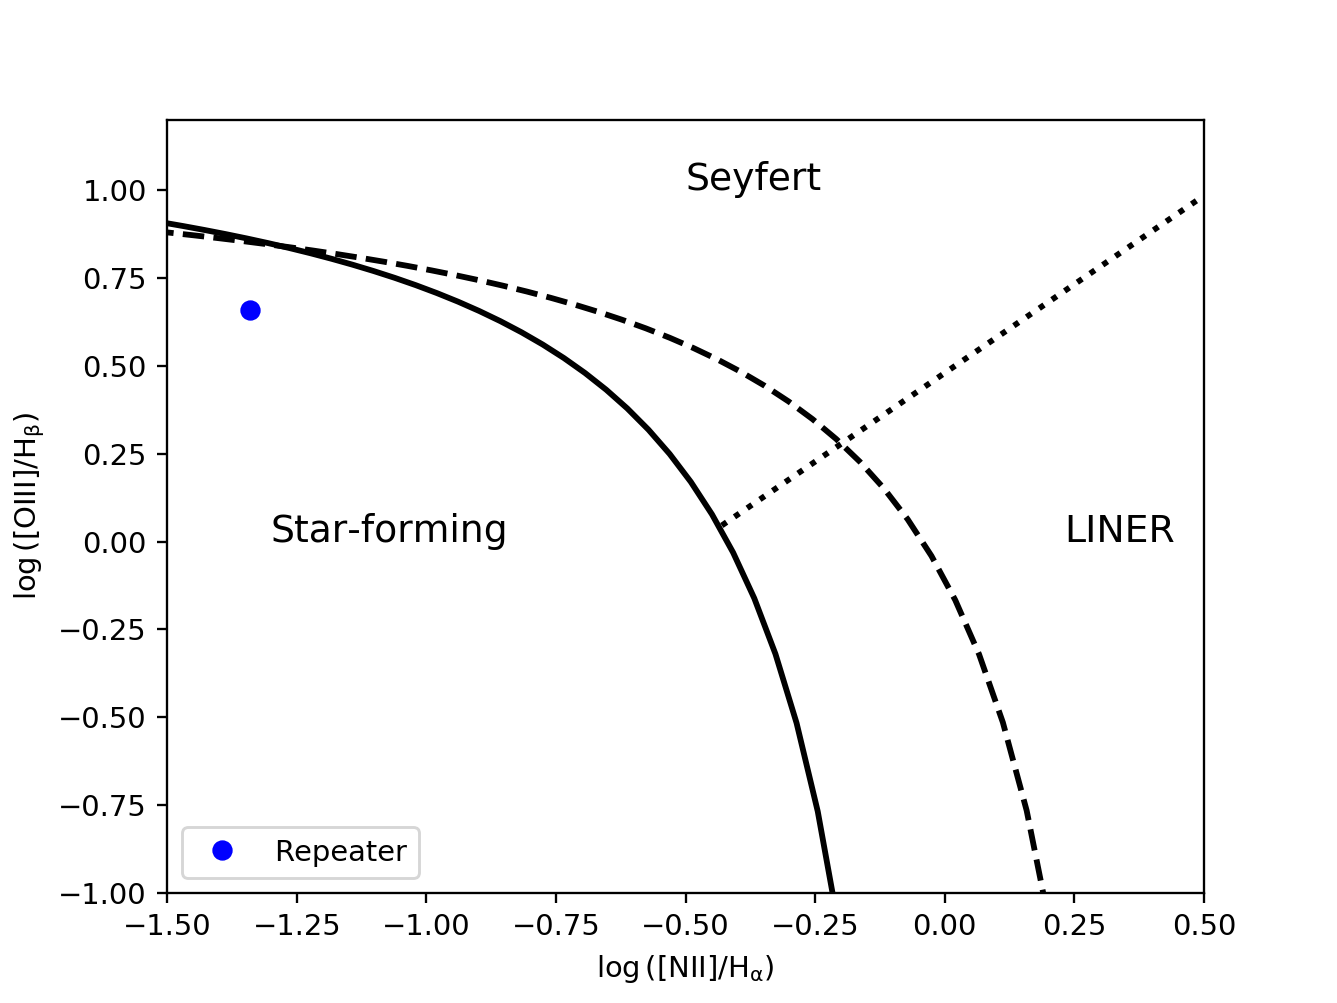

In [21]:
plt.clf()
ax_BPT = plt.gca()
# Plot FRB 121102
ax_BPT.plot([np.log10(host121102.neb_lines['[NII] 6583']/host121102.neb_lines['Ha'])],
        [np.log10(host121102.neb_lines['[OIII] 5007']/host121102.neb_lines['Hb'])], 'bo',
           label='Repeater')
# Axes
ax_BPT.set_xlabel(r"$\log \, ({\rm [NII]/H_\alpha)}$")
ax_BPT.set_ylabel(r"$\log \, ({\rm [OIII]/H_\beta)}$")
ax_BPT.set_xlim(-1.5, 0.5)
ax_BPT.set_ylim(-1, 1.2)
# Standard curves
demarc = lambda x: 0.61 / (x - 0.05) + 1.3  # Kauffman et al 2003, MNRAS, 346, 4, pp. 1055-1077. Eq 1
demarc_kewley = lambda x: 0.61 / (
            x - 0.47) + 1.19  # Kewley F., Dopita M., Sutherland R., Heisler C., Trevena J., 2001, ApJ, 556,121
demarc_liner = lambda x: 1.01 * x + 0.48  # Cid Fernandes et al 2010, MNRAS, 403,1036 Eq 10
ax_BPT.plot(np.linspace(-2, 0), demarc(np.linspace(-2, 0)), "k-", lw=2)#, label="Kauffman et al 2003")
ax_BPT.plot(np.linspace(-2, 0.25), demarc_kewley(np.linspace(-2, 0.25)), "k--", lw=2)#, label="Kewley et al 2001")
ax_BPT.plot(np.linspace(-0.43, 0.5), demarc_liner(np.linspace(-0.43, 0.5)), "k:", lw=2)#, label="Cid Fernandes et al 2010")
# Labels
lsz = 13.
ax_BPT.annotate("Star-forming", (-1.30, 0), fontsize=lsz)
ax_BPT.annotate("LINER", (0.23, 0), fontsize=lsz)
ax_BPT.annotate("Seyfert", (-0.5, 1), fontsize=lsz)
# Legend
ax_BPT.legend(loc="lower left")
# 
plt.show()

# Let's play with FRB 180924

## Load the FRB

In [3]:
frb180924 = frb.FRB.by_name('FRB180924')

## Host galaxy

In [4]:
hg180924 = frb180924.grab_host()

## How about a spectrum?

In [6]:
meta, spec = hg180924.get_metaspec()

Loading spectra from /data/spec_DB/FRB_specDB_CRAFT.hdf5
Database is FRB
Created on 2019-Jun-28
Version: v0.1
Your search yielded 1 match[es] within radius=0.5 arcsec
Staged 1 spectra totalling 6.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 6.4e-05 Gb
Loaded spectra


/home/xavier/Projects/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/data/Projects/Python/linetools/linetools/spectra/xspectrum1d.py:222: RuntimeWarning: invalid value encountered in greater
  gdsigval = np.where(self.data['sig'][kk].data > 0.)[0]
/data/Projects/Python/linetools/linetools/spectra/xspectrum1d.py:223: RuntimeWarning: invalid value encountered in less_equal
  badsigval = self.data['sig'][kk].data <= 0.
/data/Projects/Python/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/data/Projects/FRB/frb/galaxies/frbgalaxy.py:340: UserWarning: Multiple spectra returned for this galaxy.  Taking the first, but you may wish to specify your instrument
  warnings.warn("Multiple spectra returned for this gala

In [7]:
meta

RA_GROUP,DEC_GROUP,zem_GROUP,sig_zem,ZQ,R,EPOCH,GROUP_ID,FRB_ID,NPIX,WV_MIN,WV_MAX,STYPE,flag_zem,SPEC_FILE,DATE-OBS,DISPERSER,INSTR,TELESCOPE,Ref,GROUP
float64,float64,float64,float64,int64,float64,float64,int64,int64,int64,float64,float64,str3,str8,str92,str10,str4,str4,str6,str13,str4
326.10521,-40.90022,0.321,0.0,4,2000.0,2000.0,1,5,3721,4700.9,9352.1,GAL,HAND,/home/xavier/Projects/FRB/Galaxy_DB/CRAFT/Bannister2019/J214425.25-405400.8_MUSE_A_spec.fits,2018-11-05,VPHG,MUSE,VLT,Bannister2019,MUSE


### Plot

<IPython.core.display.Javascript object>


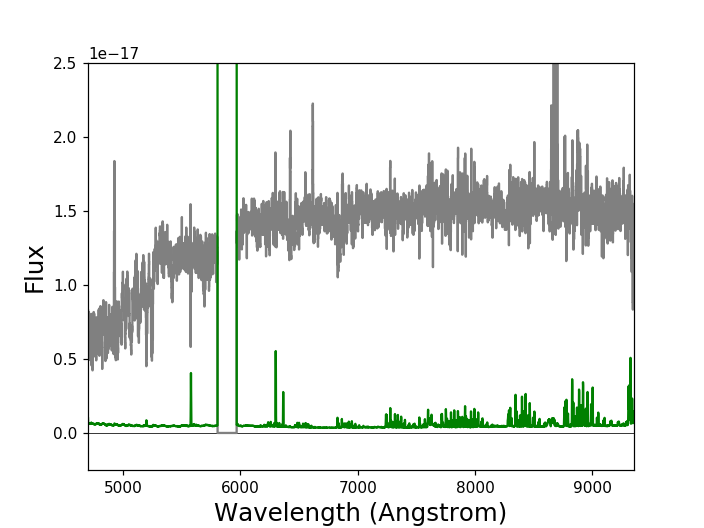

In [8]:
spec.plot()